# 2. 머신 러닝 기본

## 2.1 Linear Regression

### 선형회귀 개념

#### W 기준 시각화

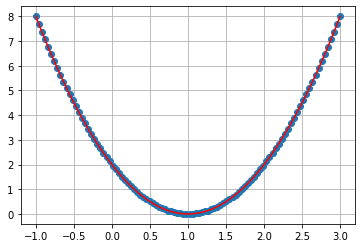

In [62]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

w = np.linspace(-1,3,100)
b = 0

j = np.zeros(100)

for i in range(len(w)):
    y_hat = w[i]*2 + b;
    j[i] = 0.5 * (y_hat - 2)**2

plt.plot(w,j, 'o' )
plt.plot(w,j, 'r-' )

plt.grid(True)
plt.show()

#### b 기준 시각화

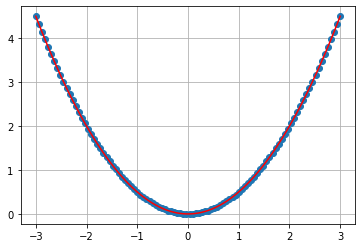

In [63]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

w = 1
b = np.linspace(-3,3,100)

j = np.zeros(100)
for i in range(len(b)):
    y_hat = w*2 + b[i];
    j[i] = 0.5 * (y_hat - 2)**2

plt.plot(b,j, 'o' )
plt.plot(b,j, 'r-' )

plt.grid(True)
plt.show()

#### W 기준 훈련 시각화

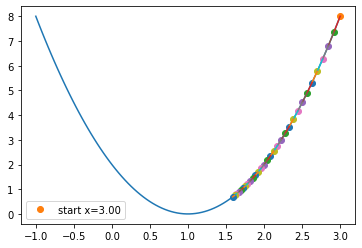

In [64]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

# simple function to demo step size
def f(x) : # A parabola
    f = 0.5*(2-x*2)**2
    return f
def Df(x) : # The derivative (gradient)
    Df = 2*(2-x*2)
    return Df
def xp1(x,alpha) : # update
    xp1 = x + alpha * Df(x)
    return xp1

def plot_steps( guess, alpha, nsteps) :
    fig, ax = plt.subplots()
    x = np.linspace(-1,3,100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x,f(x), 'o', label='start x=%.2f' %x )
    for i in range(nsteps):
        xold = x
        x = xp1(x,alpha)
        #ax.plot(x,f(x), 'o', label='x = %.2f' %x)
        ax.plot(x,f(x), 'o')
        ax.plot([xold,x],[f(xold),f(x)], '-')
    plt.legend()
    plt.show()
    
plot_steps( 3, 0.01, 30 )

#### b 기준 훈련 시각화

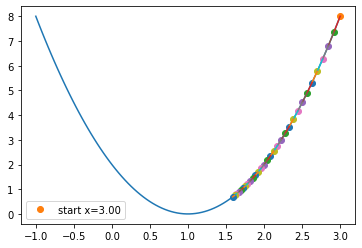

In [65]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

# simple function to demo step size
def f(x) : # A parabola
    f = 0.5*(2-x*2)**2
    return f
def Df(x) : # The derivative (gradient)
    Df = 2*(2-x*2)
    return Df
def xp1(x,alpha) : # update
    xp1 = x + alpha * Df(x)
    return xp1

def plot_steps( guess, alpha, nsteps) :
    fig, ax = plt.subplots()
    x = np.linspace(-1,3,100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x,f(x), 'o', label='start x=%.2f' %x )
    for i in range(nsteps):
        xold = x
        x = xp1(x,alpha)
        #ax.plot(x,f(x), 'o', label='x = %.2f' %x)
        ax.plot(x,f(x), 'o')
        ax.plot([xold,x],[f(xold),f(x)], '-')
    plt.legend()
    plt.show()
    
plot_steps( 3, 0.01, 30 )

### 텐서플로우로 선형회귀 구현

In [1]:
import tensorflow as tf

In [2]:
import logging    # 경고 출력 금지
logging.getLogger('tensorflow').disabled = True

### 기계 학습 문제 해결

기계 학습 문제 해결은 일반적으로 다음 단계로 구성됩니다.:

 - 훈련 데이터를 얻습니다.
 - 모델을 정의하십시오.
 - 손실 함수를 정의합니다.
 - 훈련 데이터를 실행하여 이상적인 값에서 손실을 계산합니다.
 - 손실에 대한 기울기를 계산하고 *옵티 마이저* 를 사용 하여 데이터에 맞게 변수를 조정합니다.
 - 결과를 평가하십시오.

설명을 위해이 가이드에서는 간단한 선형 모델을 개발하고, $f(x) = x * W + b$,  𝑏 , 두 개의 변수가 있습니다: $W$ (가중치) and $b$ (절편).

이것이 가장 기본적인 머신 러닝 문제입니다.:  $x$ 와 $y$, 간단한 선형 회귀 를 통해 선의 기울기와 오프셋을 찾으십시오

### Data

지도 학습은 입력 (일반적으로 x 로 표시됨 )과 출력 ( y 로 표시 , 종종 레이블 이라고 함 )을 사용합니다. 목표는 입력에서 출력 값을 예측할 수 있도록 쌍을 이룬 입력과 출력에서 ​​학습하는 것입니다.

TensorFlow에서 데이터의 각 입력은 거의 항상 텐서로 표현되며 종종 벡터입니다. 지도 학습에서 출력 (또는 예측하려는 값)도 텐서입니다.

다음은 선을 따라 점에 가우스 (일반) 노이즈를 추가하여 합성 된 데이터입니다.

In [68]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

x = tf.random.normal(shape=[NUM_EXAMPLES])

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = x * TRUE_W + TRUE_B + noise

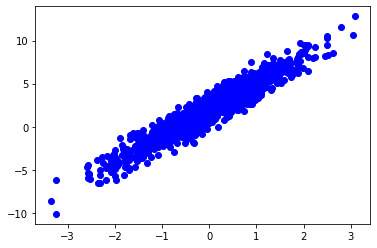

In [69]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b")
plt.show()

텐서는 일반적으로 일괄 적 으로 모 이거나 입력 및 출력 그룹이 함께 쌓입니다. 일괄 처리는 몇 가지 교육 이점을 제공 할 수 있으며 가속기 및 벡터화 된 계산과 잘 작동합니다. 이 데이터 세트가 얼마나 작은지를 감안할 때 전체 데이터 세트를 단일 배치로 처리 할 수 ​​있습니다.

### 모델 정의

tf.Variable모델의 모든 가중치를 나타내는 데 사용 합니다. A tf.Variable는 값을 저장하고 필요에 따라 텐서 형식으로 제공합니다. 자세한 내용은 변수 가이드 를 참조하세요.

tf.Module변수와 계산을 캡슐화하는 데 사용 합니다. 모든 Python 객체를 사용할 수 있지만 이렇게하면 쉽게 저장할 수 있습니다.

여기서 w 와 b 를 모두 변수로 정의 합니다.

In [70]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
#     print('MyModel.__call__()',x)
    return self.w * x + self.b

model = MyModel()

print("Variables:", model.variables)

assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


초기 변수는 여기에서 고정 된 방식으로 설정되지만 Keras에는 나머지 Keras의 유무에 관계없이 사용할 수있는 여러 초기화 프로그램 이 함께 제공됩니다.

### 손실 함수 정의

손실 함수는 주어진 입력에 대한 모델의 출력이 목표 출력과 얼마나 잘 일치하는지 측정합니다. 목표는 훈련 중에 이러한 차이를 최소화하는 것입니다. "평균 제곱"오류라고도하는 표준 L2 손실을 정의합니다.

In [71]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

모델을 학습하기 전에 모델의 예측을 빨간색으로, 학습 데이터를 파란색으로 플로팅하여 손실 값을 시각화 할 수 있습니다.

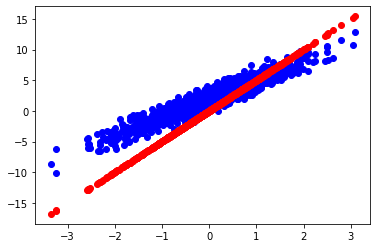

Current loss: 8.956390


In [72]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

### 훈련 루프 정의

훈련 루프는 순서대로 세 가지 작업을 반복적으로 수행하는 것으로 구성됩니다.:

* 모델을 통해 입력 배치를 전송하여 출력 생성
* 출력을 출력 (또는 레이블)과 비교하여 손실 계산
* 그라디언트 테이프를 사용하여 그라디언트 찾기
* 이러한 그라디언트로 변수 최적화

이 예제에서는 경사 하강 법을 사용하여 모델을 훈련 할 수 있습니다.

#### TF로 구현하는 훈련 루프

##### 샘플 1개씩 학습

In [73]:
def train(model, x, y, learning_rate):
  for x_i, y_i in zip(x,y):
      with tf.GradientTape() as t:
        current_loss = loss(y_i, model(x_i))

      dw, db = t.gradient(current_loss, [model.w, model.b])

      model.w.assign_sub(learning_rate * dw)
      model.b.assign_sub(learning_rate * db)

##### 샘플 전체 한번에 학습(batch)

In [74]:
def train(model, x, y, learning_rate):
      with tf.GradientTape() as t:
        current_loss = loss(y, model(x))

      dw, db = t.gradient(current_loss, [model.w, model.b])

      model.w.assign_sub(learning_rate * dw)
      model.b.assign_sub(learning_rate * db)

훈련을 살펴 보려면 훈련 루프를 통해 x 와 y 의 동일한 배치를 보내고 W 와 b 어떻게 업데이트 하는지 확인할 수 있습니다.

In [75]:
model = MyModel()

Ws, bs = [], []
epochs = range(10)

def training_loop(model, x, y):

  for epoch in epochs:

    train(model, x, y, learning_rate=0.1)

    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=8.95639
Epoch  0: W=4.58 b=0.39, loss=6.04224
Epoch  1: W=4.26 b=0.70, loss=4.18851
Epoch  2: W=4.00 b=0.95, loss=3.00901
Epoch  3: W=3.79 b=1.16, loss=2.25832
Epoch  4: W=3.63 b=1.32, loss=1.78042
Epoch  5: W=3.50 b=1.45, loss=1.47611
Epoch  6: W=3.39 b=1.56, loss=1.28228
Epoch  7: W=3.31 b=1.64, loss=1.15880
Epoch  8: W=3.25 b=1.71, loss=1.08011
Epoch  9: W=3.20 b=1.76, loss=1.02995


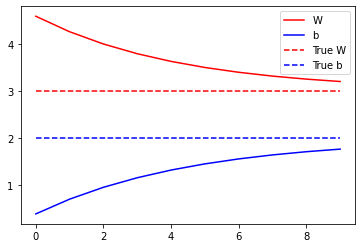

In [76]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

training_loop(model, x, y)

plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

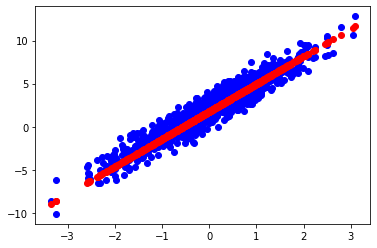

Current loss: 1.029955


In [77]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

### 다변수 선형회귀 구현

In [311]:
import tensorflow as tf

x = tf.constant([[-1,2],[-3,4],[-5,6],[-7,8],[-9,10]], dtype=tf.float32)
y = tf.constant([[8],[10],[12],[14],[16]], dtype=tf.float32)

In [312]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    self.w = tf.Variable([[1.0],[1.0]])
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return tf.matmul(x, self.w) + self.b

In [313]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [314]:
def train(model, x, y, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(y, model(x))

    dw, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

In [315]:
model = MyModel()

Ws, bs = [], []
epochs = range(1000)

def training_loop(model, x, y):

  for epoch in epochs:

    train(model, x, y, learning_rate=0.01)

    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))
  print("ending W1=%1.2f W2=%1.2f b=%1.2f, loss=%2.5f" %
        (Ws[-1][0], Ws[-1][1],bs[-1], current_loss))

Starting: W1=1.00 W2=1.00 b=0.00, loss=129.00000
ending W1=2.33 W2=3.33 b=3.66, loss=0.00002


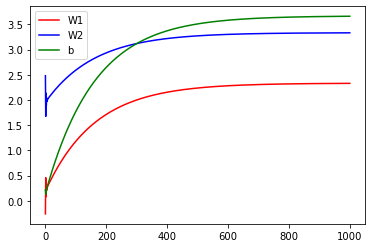

In [316]:
print("Starting: W1=%1.2f W2=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w[0], model.w[1], model.b, loss(y, model(x))))

training_loop(model, x, y)

w1 = [w[0] for w in Ws ]
w2 = [w[1] for w in Ws ]
plt.plot(epochs, w1, "r",  epochs, w2, "b", epochs, bs, "g")

plt.legend(["W1", "W2", "b"])
plt.show()

In [317]:
model(x[4:5])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[16.004015]], dtype=float32)>